In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [2]:
#xma = np.random.randint(1,50000,100)
xma = np.random.normal(0,25,1000)

In [3]:
#lets create a MA series having mean 2 and of order 2
y5 = 2 + xma + 0.8*np.roll(xma,-1) + 0.6*np.roll(xma,-2) #+ 0.6 *np.roll(xma,-3)

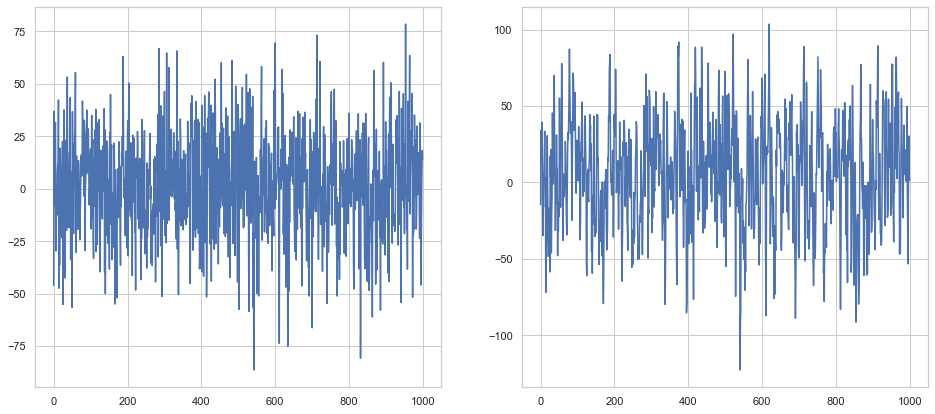

In [5]:
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(xma)
plt.subplot(122)
plt.plot(y5)
plt.show()

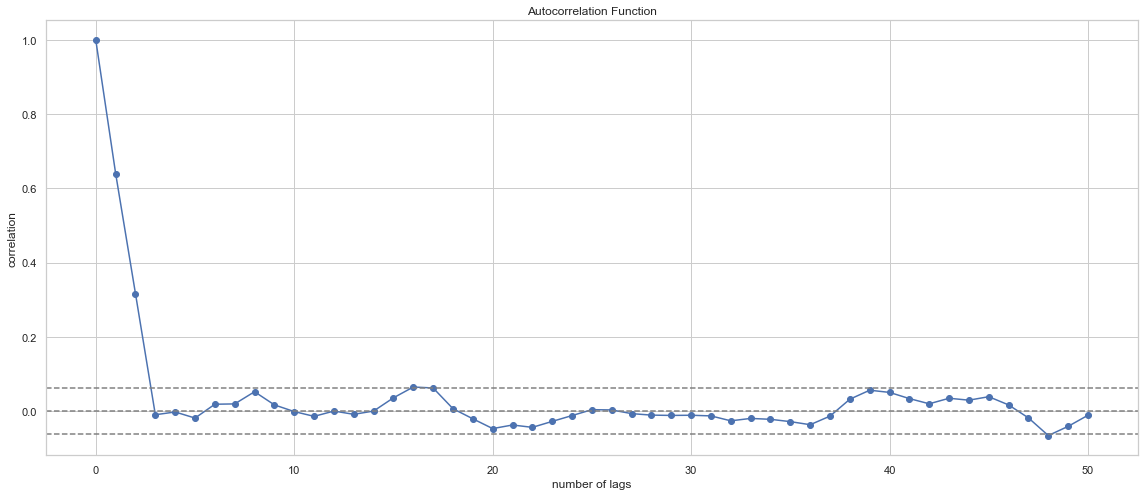

In [7]:
#calling acf function from stattools
lag_acf = acf(y5, nlags=50)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()
plt.show()

As per above plot we have good correlation up to 2nd lag, this is the lag after which plot cuts the upper confidence interval. Order q of series obtained by the plot is 2, which is correct as we had defined our series with linear combination of residuals up to lag 2.
Thus this proves that ACF correctly predicted order of our MA series.

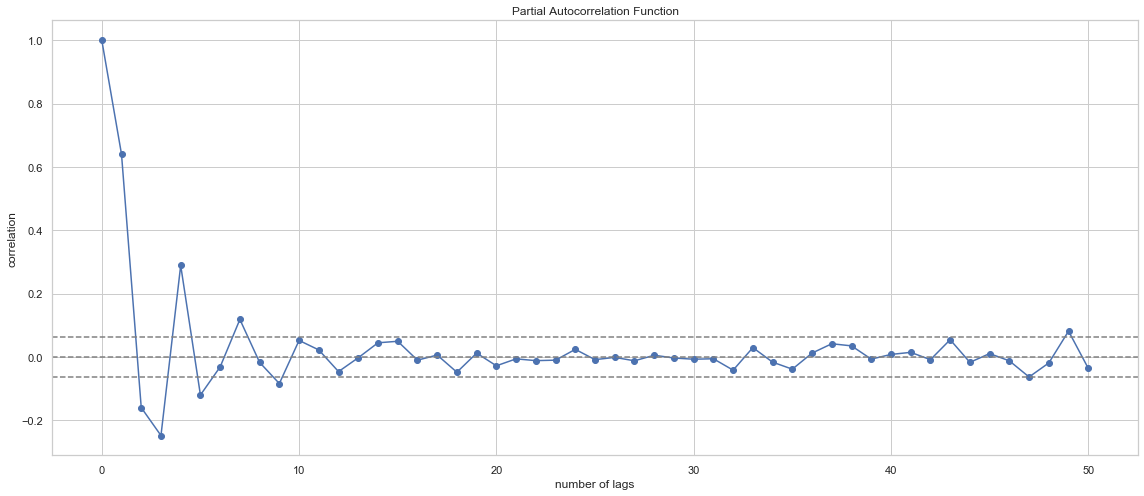

In [8]:
#calling pacf function from stattool
lag_pacf = pacf(y5, nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()
plt.show()

If we see PACF plot there are many instances where correlation is above upper confidence band as PACF calculates correlations of lags of time series with residuals and our series itself is linear combination of residual and its lagged values. Hence we can get good correlation for near as well as past lags.